In [65]:
# Dependencies
from bs4 import BeautifulSoup
import requests
from splinter import Browser
import pandas as pd
import time

In [66]:
# activate splinter
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

# Window Users- comment out the 2 lines above, and uncomment the 2 lines below
# executable_path = {'executable_path': 'chromedriver.exe'}
# browser = Browser('chrome', **executable_path, headless=False)


<html class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" lang="en" style="--vh:636px;" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5ec30b23f570b062&amp;bkl=0&amp;bl=1&amp;pdt=213&amp;sid=5ec30b23f570b062&amp;pub=ra-5a690e4c1320e328&amp;rev=v8.28.5-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=mars.nasa.gov&amp;fp=news%2F&amp;fr=&amp;of=1&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;mk=Mars%2Cmissions%2CNASA%2Crover%2CCuriosity%2COpportunity%2CInSight%2CMars%20Reconnaissance%20Orbiter%2Cfacts&amp;colc=1589840675496&amp;jsl=1&amp;skipb=1&amp;callback=addthis.cbs.jsonp__87573130667238170" type="text/javascript">
  </script>
  <script src=
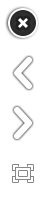
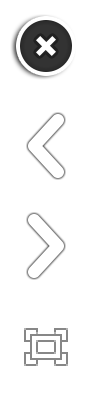
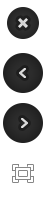
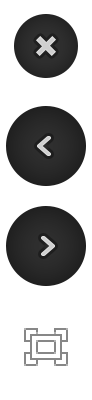
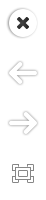
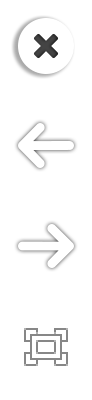
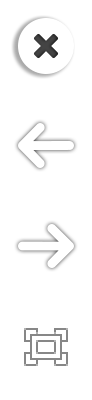

In [67]:
# URL of page to be scraped
url = 'https://mars.nasa.gov/news/'

browser.visit(url)
html = browser.html

# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(html, 'html.parser')

# Examine the results, then determine element that contains sought info
print(soup.prettify())


In [68]:
# Scrape the NASA Mars News Site and collect the latest News Title and Paragraph Text
news_title = soup.find_all('div', class_="content_title")[1].text
news_title
news_p = soup.find_all('div', class_='rollover_description_inner')[6].text.strip()
news_p


"As part of NASA's 'Send Your Name to Mars' campaign, they've been stenciled onto three microchips along with essays from NASA's 'Name the Rover' contest. Next stop: Mars."

In [16]:
base_url = 'https://www.jpl.nasa.gov'
url2 = 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'
browser.visit(url2)

# HTML object
html = browser.html
# Parse HTML with Beautiful Soup
soup = BeautifulSoup(html, 'html.parser')

a_tag = soup.footer.find('a')
href = a_tag['data-fancybox-href']
featured_image_url = base_url + href
    
featured_image_url


'https://www.jpl.nasa.gov/spaceimages/images/mediumsize/PIA17564_ip.jpg'

In [137]:
url3 = 'https://twitter.com/marswxreport?lang=en'
browser.visit(url3)
time.sleep(5)

In [156]:
# HTML object
html = browser.html
# Parse HTML with Beautiful Soup
soup = BeautifulSoup(html, 'html.parser')

tweet = soup.find_all('article')
mars_weather = tweet[0].find_all('span')[4].text

mars_weather


'InSight sol 523 (2020-05-16) low -93.2ºC (-135.7ºF) high -2.2ºC (28.0ºF)\nwinds from the SW at 5.0 m/s (11.2 mph) gusting to 18.2 m/s (40.7 mph)\npressure at 7.00 hPa'

In [53]:
url4 = 'https://space-facts.com/mars/'
tables = pd.read_html(url4)
tables


[                      0                              1
 0  Equatorial Diameter:                       6,792 km
 1       Polar Diameter:                       6,752 km
 2                 Mass:  6.39 × 10^23 kg (0.11 Earths)
 3                Moons:            2 (Phobos & Deimos)
 4       Orbit Distance:       227,943,824 km (1.38 AU)
 5         Orbit Period:           687 days (1.9 years)
 6  Surface Temperature:                   -87 to -5 °C
 7         First Record:              2nd millennium BC
 8          Recorded By:           Egyptian astronomers,
   Mars - Earth Comparison             Mars            Earth
 0               Diameter:         6,779 km        12,742 km
 1                   Mass:  6.39 × 10^23 kg  5.97 × 10^24 kg
 2                  Moons:                2                1
 3      Distance from Sun:   227,943,824 km   149,598,262 km
 4         Length of Year:   687 Earth days      365.24 days
 5            Temperature:    -153 to 20 °C      -88 to 58°C,
           

In [54]:
df = tables[0]
df


,0,1
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.39 × 10^23 kg (0.11 Earths)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.38 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-87 to -5 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [55]:
df.columns = df.columns.map(str)
df


,0,1
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.39 × 10^23 kg (0.11 Earths)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.38 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-87 to -5 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [56]:
df = df.set_index("0")
df

,1
0,
Equatorial Diameter:,"6,792 km"
Polar Diameter:,"6,752 km"
Mass:,6.39 × 10^23 kg (0.11 Earths)
Moons:,2 (Phobos & Deimos)
Orbit Distance:,"227,943,824 km (1.38 AU)"
Orbit Period:,687 days (1.9 years)
Surface Temperature:,-87 to -5 °C
First Record:,2nd millennium BC
Recorded By:,Egyptian astronomers


In [57]:
df = df.rename(columns={"1":"Value"})
df


,Value
0,
Equatorial Diameter:,"6,792 km"
Polar Diameter:,"6,752 km"
Mass:,6.39 × 10^23 kg (0.11 Earths)
Moons:,2 (Phobos & Deimos)
Orbit Distance:,"227,943,824 km (1.38 AU)"
Orbit Period:,687 days (1.9 years)
Surface Temperature:,-87 to -5 °C
First Record:,2nd millennium BC
Recorded By:,Egyptian astronomers


In [64]:
df.index.rename('Description', inplace=True)
df


,Value
Description,
Equatorial Diameter:,"6,792 km"
Polar Diameter:,"6,752 km"
Mass:,6.39 × 10^23 kg (0.11 Earths)
Moons:,2 (Phobos & Deimos)
Orbit Distance:,"227,943,824 km (1.38 AU)"
Orbit Period:,687 days (1.9 years)
Surface Temperature:,-87 to -5 °C
First Record:,2nd millennium BC
Recorded By:,Egyptian astronomers


In [82]:
mars_data_html_table = df.to_html()
print(mars_data_html_table)


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Equatorial Diameter:</th>
      <th>Polar Diameter:</th>
      <th>Mass:</th>
      <th>Moons:</th>
      <th>Orbit Distance:</th>
      <th>Orbit Period:</th>
      <th>Surface Temperature:</th>
      <th>First Record:</th>
      <th>Recorded By:</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>6,792 km</td>
      <td>6,752 km</td>
      <td>6.39 × 10^23 kg (0.11 Earths)</td>
      <td>2 (Phobos &amp; Deimos)</td>
      <td>227,943,824 km (1.38 AU)</td>
      <td>687 days (1.9 years)</td>
      <td>-87 to -5 °C</td>
      <td>2nd millennium BC</td>
      <td>Egyptian astronomers</td>
    </tr>
  </tbody>
</table>


In [73]:
# opens up new browswer in splinter
url_hemispheres = "https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars"
browser.visit(url_hemispheres)
# HTML object
time.sleep(1)
html = browser.html
# Parse HTML with Beautiful Soup
soup = BeautifulSoup(html, 'html.parser')

hemisphere_image_urls = []
base_url2 = "https://astrogeology.usgs.gov"


In [74]:
all_hem_names = soup.find_all('div', class_="description")
all_hem_names

list_hem = []

for hem in all_hem_names:
    list_hem.append(hem.h3.text)

list_hem


['Cerberus Hemisphere Enhanced',
 'Schiaparelli Hemisphere Enhanced',
 'Syrtis Major Hemisphere Enhanced',
 'Valles Marineris Hemisphere Enhanced']

In [75]:
def hem_imgs_func():
    
    # HTML object
    html = browser.html
    # Parse HTML with Beautiful Soup
    soup = BeautifulSoup(html, 'html.parser')
    section = soup.find('div', id="wide-image")
    src = section.find('img', class_="wide-image")['src']
    img_var = base_url2 + src
    section = soup.find('section', class_="metadata")
    name = section.h2.text
    name = name.rsplit(' ', 1)[0]
    hemisphere_image_urls.append({"title": name, "image_url": img_var})
    
    return hemisphere_image_urls


In [76]:
# Parse HTML with Beautiful Soup
soup = BeautifulSoup(html, 'html.parser')

for hem in list_hem:
    button = browser.links.find_by_partial_text(hem)
    button.click()
    hem_imgs_func()
    browser.back()

hemisphere_image_urls

[{'title': 'Cerberus Hemisphere',
  'image_url': 'https://astrogeology.usgs.gov/cache/images/f5e372a36edfa389625da6d0cc25d905_cerberus_enhanced.tif_full.jpg'},
 {'title': 'Schiaparelli Hemisphere',
  'image_url': 'https://astrogeology.usgs.gov/cache/images/3778f7b43bbbc89d6e3cfabb3613ba93_schiaparelli_enhanced.tif_full.jpg'},
 {'title': 'Syrtis Major Hemisphere',
  'image_url': 'https://astrogeology.usgs.gov/cache/images/555e6403a6ddd7ba16ddb0e471cadcf7_syrtis_major_enhanced.tif_full.jpg'},
 {'title': 'Valles Marineris Hemisphere',
  'image_url': 'https://astrogeology.usgs.gov/cache/images/b3c7c6c9138f57b4756be9b9c43e3a48_valles_marineris_enhanced.tif_full.jpg'}]